In [12]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Cài đặt thư viện

Đầu tiên, ta thêm thư viện pandas, numpy và Prophet. 

In [14]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Thêm thư viện tắt thông báo

In [15]:
import warnings
warnings.simplefilter('ignore')

Thêm thư viện đọc dữ liệu của Google Drive

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

<h1>Đọc dữ liệu</h1>
Đầu vào của Prophet luôn là một tập dữ liệu với hai thuộc tính là ds và y. trong đó, ds có định dạng ngày, đánh dấu mốc thời gian. Và cột y đại diện cho giá trị định lượng, đại diện cho phép đo mà ta dự đoán.

In [18]:
train_ETH = pd.read_csv("/content/drive/My Drive/Năm 3/Làm nhóm HK2 2021 - 2022/Cá nhân/More/SF/Dataset/Data/8_2/btc/bitcoin_train_8_2.csv", parse_dates=True, index_col=0)
train_ETH.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-06-01,9.4545,10.3018,9.4297,10.1893,796676,USD
2020-06-02,10.1907,10.2073,9.3473,9.5276,1058556,USD
2020-06-03,9.5270,9.6672,9.4217,9.6672,558116,USD
2020-06-04,9.6672,9.8644,9.4909,9.7944,593664,USD
2020-06-05,9.7940,9.8461,9.6287,9.6312,527054,USD


In [19]:
train = train_ETH[["Open"]]
train.head(5)

,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940


In [20]:
train = train.reset_index(level=0)
train.columns = ['ds','y']
train.head(5)

,ds,y
0,2020-06-01,9.4545
1,2020-06-02,10.1907
2,2020-06-03,9.5270
3,2020-06-04,9.6672
4,2020-06-05,9.7940


In [21]:
test_ETH = pd.read_csv("/content/drive/My Drive/Năm 3/Làm nhóm HK2 2021 - 2022/Cá nhân/More/SF/Dataset/Data/8_2/btc/bitcoin_test_8_2.csv", parse_dates=True, index_col=0)
test_ETH.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-01-07,43.0979,43.1277,40.8100,41.5467,88358,USD
2022-01-08,41.5513,42.3044,40.5743,41.6720,52544,USD
2022-01-09,41.6812,42.7644,41.2609,41.8483,37512,USD
2022-01-10,41.8489,42.2438,39.6970,41.8322,85501,USD
2022-01-11,41.8291,43.0902,41.2876,42.7332,61779,USD


In [22]:
test = test_ETH[["Open"]]
test.head(5)

,Open
Date,
2022-01-07,43.0979
2022-01-08,41.5513
2022-01-09,41.6812
2022-01-10,41.8489
2022-01-11,41.8291


In [23]:
test = test.reset_index(level=0)
test.columns = ['ds','y']
test.tail(5)

,ds,y
141,2022-05-28,28.6201
142,2022-05-29,29.0271
143,2022-05-30,29.4652
144,2022-05-31,31.7302
145,2022-06-01,31.7931


In [24]:
df = pd.concat([train, test],    # Combine vertically
                          ignore_index = True,
                          sort = False)
df.head(5)    

,ds,y
0,2020-06-01,9.4545
1,2020-06-02,10.1907
2,2020-06-03,9.5270
3,2020-06-04,9.6672
4,2020-06-05,9.7940


In [25]:
df.tail(5)    

,ds,y
726,2022-05-28,28.6201
727,2022-05-29,29.0271
728,2022-05-30,29.4652
729,2022-05-31,31.7302
730,2022-06-01,31.7931


<h1>Trực quan hóa dữ liệu

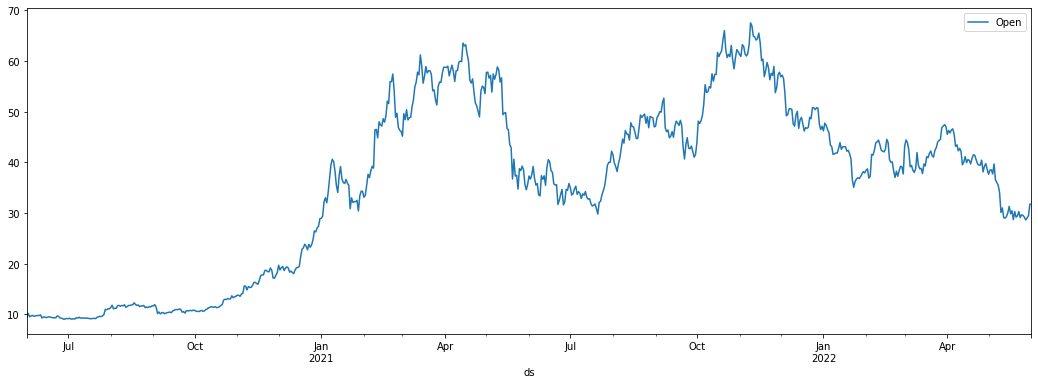

In [26]:
df.plot(x="ds", y='y',figsize=(18,6), label="Open")

<li>Ta xây dựng mô hình thông qua hàm Prophet()

In [27]:
interrupt = len(train)
interrupt

585

In [28]:
# Check size
print(train.shape)  
print(test.shape)  

(585, 2)
(146, 2)


In [29]:
future = df.copy()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


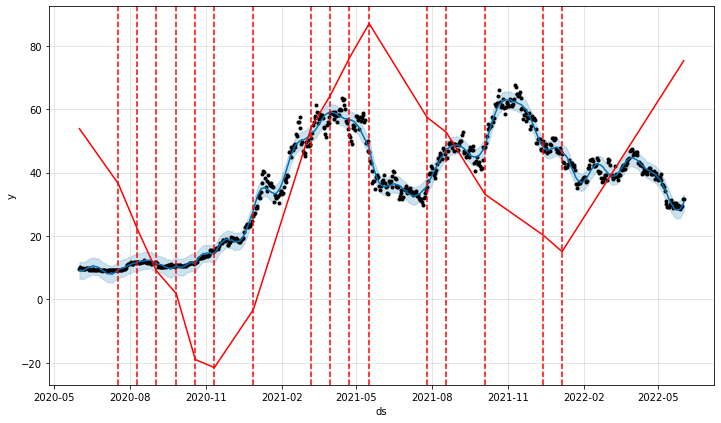

In [30]:
m = Prophet(changepoint_prior_scale=.99)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

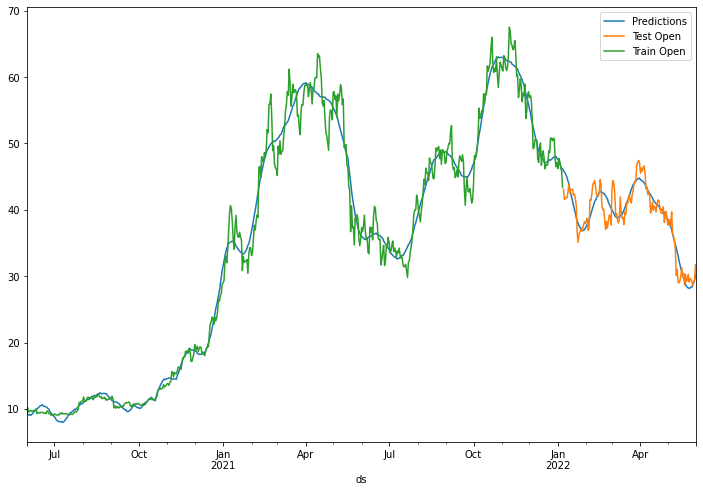

In [31]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='Test Open',legend=True,ax=ax)
train.plot(x='ds',y='y',label='Train Open',legend=True,ax=ax)
#,xlim=((datetime.strptime(current_time, '%Y-%m-%d') - timedelta(days = 30)).strftime("%Y-%m-%d"),current_time)

In [32]:
mae = mean_absolute_error(test.y, forecast[interrupt:].yhat)
mape = mean_absolute_percentage_error(test.y, forecast[interrupt:].yhat)
mse = mean_squared_error(test.y, forecast[interrupt:].yhat)
rmse = np.sqrt(mse)
r2 = r2_score(test.y, forecast[interrupt:].yhat)
# print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")
# print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAPE: 3.72%
RMSE: 1.88
R2: 0.85
